In [3]:
#
# Code to plot Covid-19 infection data for Erie County and Amherst NY
# Date: 2020-04-08
# Author: Will Kinney, Dept. of Physics, Univ. a Buffalo, SUNY
# License: Code is public domain
#
# Please note that this is not an epidemiological model, and is not intented for forecasting
# purposes. Use responsibly. 
#
# Data source: https://erieny.maps.arcgis.com/apps/opsdashboard/index.html#/dd7f1c0c352e4192ab162a1dfadc58e1
#

In [4]:
import sys,csv
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


#
# Read spreadsheet of current data.
#
f = open('ErieCounty.csv','r')
cs = csv.reader(f, delimiter=',')
db = []
for row in cs:
     db.append(row)

dates = []
county = []
amherst = []
deaths = []
for i in range(1,len(db)):
	dates.append(db[i][0].rstrip('%'))
	county.append(int(db[i][1].rstrip('%')))
	amherst.append(int(db[i][2].rstrip('%')))
	deaths.append(int(db[i][3].rstrip('%')))
    
days = np.arange(len(dates))

#
# Fit most recent ten days of data to exponential
#
x = np.array(days[len(dates)-10:])
datesfit = np.array(days[len(dates)-10:])
y = np.array(county[len(county)-10:])
coeff = np.polyfit(x,np.log(y),1,w=np.sqrt(y))
countyfit = np.exp(coeff[1]) * np.exp(coeff[0]*datesfit)
countydouble = np.log(2) / coeff[0]


y = np.array(amherst[len(amherst)-10:])
coeff = np.polyfit(x,np.log(y),1,w=np.sqrt(y))
amherstfit = np.exp(coeff[1]) * np.exp(coeff[0]*datesfit)
amherstdouble = np.log(2) / coeff[0]

y = np.array(deaths[len(deaths)-10:])
coeff = np.polyfit(x,np.log(y),1,w=np.sqrt(y))
deathsfit = np.exp(coeff[1]) * np.exp(coeff[0]*datesfit)
deathsdouble = np.log(2) / coeff[0]

#
# Fit first nine days of county data.  
#
x = np.array(days[:8])
y = np.array(county[:8])
coeff = np.polyfit(x,np.log(y),1,w=np.sqrt(y))
earlyfit = np.exp(coeff[1]) * np.exp(coeff[0]*days)
earlydouble = np.log(2) / coeff[0]

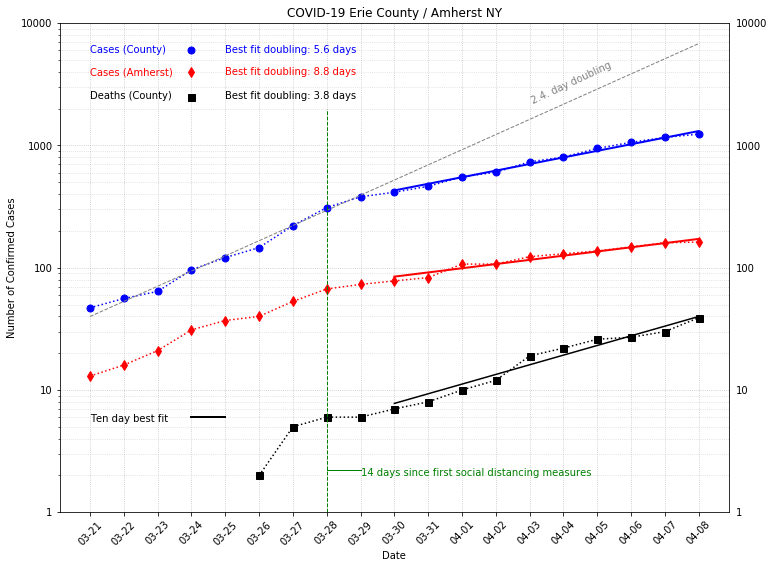

In [6]:
#
# Initialize plot.
#
days = np.arange(len(dates))
fig, ax = plt.subplots(figsize=(12,9))
msize=7

#
# Plot data and fits
#
plt.plot(dates,county,color='blue',marker='o',markersize=msize,linestyle='dotted')
plt.plot(datesfit,countyfit,color='blue',linewidth=2)
plt.plot(dates,amherst,color='red',marker='d',markersize=msize,linestyle='dotted')
plt.plot(datesfit,amherstfit,color='red',linewidth=2)
plt.plot(dates[5:],deaths[5:],color='black',marker='s',markersize=msize,linestyle='dotted')
plt.plot(datesfit,deathsfit,color='black')
plt.plot(dates,earlyfit,color='grey',linestyle='dashed',linewidth=1)

#
# Plot labels for legend
#
col = int(len(dates) / 4 - 1)
plt.plot(dates[col],6000,marker='o',color='blue',markersize=msize)
plt.text(dates[0],5750,'Cases (County)',color='blue')
label = 'Best fit doubling: ' + str(np.round(countydouble,1)) + ' days'
plt.text(dates[col+1],5750,label,color='blue')

plt.plot(dates[col],3950,marker='d',color='red',markersize=msize)
plt.text(dates[0],3750,'Cases (Amherst)',color='red')
label = 'Best fit doubling: ' + str(np.round(amherstdouble,1)) + ' days'
plt.text(dates[col+1],3750,label,color='red')

plt.plot(dates[col],2500,marker='s',color='black',markersize=msize)
plt.text(dates[0],2400,'Deaths (County)',color='black')
label = 'Best fit doubling: ' + str(np.round(deathsdouble,1)) + ' days'
plt.text(dates[col+1],2400,label,color='black')

plt.text(dates[13],4300,'2.4. day doubling',rotation=25,color='grey')

plt.text(dates[0],5.5,'Ten day best fit',color='black')
plt.plot(dates[col:col+2],[6,6],color='black',linewidth=2)

#
# Plot line indicating 14 days after onset of social distancing. 
#
x = [dates[7],dates[7]]
y = [1,2000]
plt.plot(x,y,linestyle='dashed',color='green',linewidth=1)
plt.text(dates[8],2,'14 days since first social distancing measures',color='green')
plt.plot([7,8],[2.2,2.2],color='green',linewidth=1)


#
# Format plot
#
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.yscale('log')
plt.ylim([1,10000])
formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
ax.yaxis.set_major_formatter(formatter)
ax.grid(linestyle='dotted',color='grey',alpha=0.5)
ax.grid(which='minor',linestyle='dotted',alpha=0.5)
ax.tick_params(labelright=True)
plt.xticks(rotation=45)
plt.title('COVID-19 Erie County / Amherst NY')
plt.savefig('ErieCounty.png')
